# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
import numpy as np

In [3]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [32]:
plans.head(20)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [33]:
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN
5,10005,Luis,Garcia,61,MTY,2022-01-02 08:51:29.572393098,Basico,NaN
6,10006,Sofia,Lopez,39,Bogotá,2022-01-02 15:25:47.486871717,Basico,NaN
7,10007,Sofia,Gomez,70,Medellín,2022-01-02 22:00:05.401350337,Premium,NaN
8,10008,Sofia,Garcia,76,CDMX,2022-01-03 04:34:23.315828957,Basico,NaN
9,10009,Mateo,Torres,47,Bogotá,2022-01-03 11:08:41.230307576,Basico,NaN


In [35]:
usage.head(5)


,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [4]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [19]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [20]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [5]:
# cantidad de nulos para users
print(users.isna().sum())



user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64


In [73]:
print(usage.isna().sum())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

**Data Frame USERS.**
Las columnas con valores nulos son:
- city              Para esta columna la proporcion es baja, por lo que se ignoran los valores
- churn_date        Para este campo el porcentaje de valores nulos es alto, por lo que describe el campo son     ususuarios que siguen activos, por lo que en este caso es conveniente ignorar

**Data Frame USAGE.**
Las columnas con valores nulos son:

- date       Es un porcentaje bajo, se puede imputar o dejar como nulo
- duration   
- length

Para las columnas **duration** y **length** se observa que estan asociadas al campo **type** donde se tiene dos valores unicos **text** y **call**, todas los filas de tipo call tiene duracion y las de tipo text tienen longitud, por lo que la informacion se debe matener, ambas columnas estan correlacionada a la columna **type**.


### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [49]:
users.describe()


,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,48.122250
std,1154.844867,17.690408
min,10000.000000,18.000000
25%,10999.750000,33.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` indica un registro unico para cada usuario.
- La columna `age` Indica la edad de cada usuario, se observan valores atipicos (-999), por lo que se puede imputar con la media.

In [42]:
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id`correposnden a identificadores de usuario, es un campo clave para vincular con la base de datos users
- Las columnas `duration` y `length` indica la duracion  de la llamada y longitud del mensaje respectivamente 

In [6]:
# explorar columnas categóricas de users
#columnas_user = 
users['city'].describe()
users['plan'].describe()


count       4000
unique         2
top       Basico
freq        2595
Name: plan, dtype: object

- La columna `city` Tiene 7 datos unicos, siendo Bogota el mas repetido y tiene 469 valores nulos
- La columna `plan` tiene dos valores unicos, siendo **Basico**el que mas se repite, no tiene valores nulos.

In [7]:
# explorar columna categórica de usage
usage['type'].describe()
#usage['type'].isna().sum()

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type` tiene dos volores unicos siendo **text** el que mas se repite, no tiene valores nulos


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?
    - Para la columna **city** se encontraron valores nulos
- ¿Qué acción tomarías?
    - Por la cantidad de registro conviene investigar si corresponden a alguna otra ciudad o eliminar 

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [8]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'])  # completa el código

In [9]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date']) # completa el código

In [10]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].describe()

count                    4000
unique                   3961
top       2026-05-10 00:00:00
freq                       40
first     2022-01-01 00:00:00
last      2026-05-10 00:00:00
Name: reg_date, dtype: object

En `reg_date`, Se repite mas el año 2026, parce ser una inconsistencia ya que no es una fecha futura, la fecha mas antigua es de 2022

In [12]:
# Revisar los años presentes en `date` de usage
usage['date'].describe()

count                             39950
unique                            39950
top       2024-06-16 13:26:59.770494262
freq                                  1
first               2024-01-01 00:00:00
last                2024-06-30 00:00:00
Name: date, dtype: object

En `date`, el año que mas se repite es 2024,
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
   -Para users si hay fechas futuras y la mas antigua es de 2022.
- ¿Qué harías con ellas?
   -El porcentaje de datos es bajo, por lo que los eliminaria

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [13]:
# Reemplazar -999 por la mediana de age
age_mediana = users['age'].median()
users.loc[users['age'] == -999, 'age'] = age_mediana

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [12]:
# Reemplazar ? por NA en city
users.loc[users['city'] == '?','city'] = 'NA'

# Verificar cambios
users['city'].sample(20)

2417    Medellín
1153        Cali
1601      Bogotá
349          GDL
3559        CDMX
2053    Medellín
1144      Bogotá
1835      Bogotá
2337          NA
3154        CDMX
2044         MTY
292         CDMX
204       Bogotá
1365        CDMX
2874        CDMX
3271    Medellín
3595        Cali
1211    Medellín
1935        CDMX
3382      Bogotá
Name: city, dtype: object

In [14]:
# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'] > '2025-12-31','reg_date'] = 'NA'

# Verificar cambios
users['reg_date'].describe()

count     4000
unique    3961
top         NA
freq        40
Name: reg_date, dtype: object

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [15]:

# Verificación MAR en usage (Missing At Random) para duration
usage['duration'].isna().groupby(usage['type']).mean()


type
call    0.000000
text    0.999276
Name: duration, dtype: float64

In [16]:
# Verificación MAR en usage (Missing At Random) para length
usage_filter = usage[(usage['duration'] > 0) & (usage['length'] > 0)]
usage_filter.describe()
usage['length'].isna().groupby(usage['type']).mean()

type
call    0.99933
text    0.00000
Name: length, dtype: float64

Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`
**Diagonstico**

El valor de las columnas **duration** y **length** depende completamente del valor de la columna **type**. 

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [18]:
# Columnas auxiliares
import numpy as np

usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes

usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas
usage['mins_call'] = np.where(usage['type'] == 'call',usage['duration'], 0)

# Agrupar información por usuario
usage_agg = usage[['is_text','is_call','mins_call']] .groupby(usage['user_id']).sum().reset_index()

# observar resultado
usage_agg.sample(10)

,user_id,is_text,is_call,mins_call
3193,13194,8,5,14.23
3144,13145,4,7,21.94
2053,12054,8,6,58.97
2091,12092,4,6,49.28
2776,12777,4,5,9.79
220,10220,5,7,22.75
178,10178,7,6,30.57
379,10379,5,7,36.53
1096,11097,1,4,16.65
3467,13468,9,6,39.51


In [20]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={'is_text':'cant_mensajes','is_call':'cant_llamadas','mins_call':'cant_minutos_llamada'})
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [21]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = usage_agg.merge(users, on='user_id', how='left')
user_profile.head(5)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00,Basico,NaN
1,10001,5,10,33.18,Mateo,Torres,53.0,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [22]:
# Resumen estadístico de las columnas numéricas
user_profile.describe()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,age
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,11999.729432,5.524381,4.478120,22.836934,48.124531
std,1154.898108,2.358416,2.144238,16.590213,17.692032
min,10000.000000,0.000000,0.000000,0.000000,18.000000
25%,10999.500000,4.000000,3.000000,11.095000,33.000000
50%,12000.000000,5.000000,4.000000,19.740000,47.000000
75%,12999.500000,7.000000,6.000000,31.185000,63.000000
max,13999.000000,17.000000,15.000000,155.690000,79.000000


In [23]:
# Distribución porcentual del tipo de plan
user_profile['plan'].value_counts()

Basico     2594
Premium    1405
Name: plan, dtype: int64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

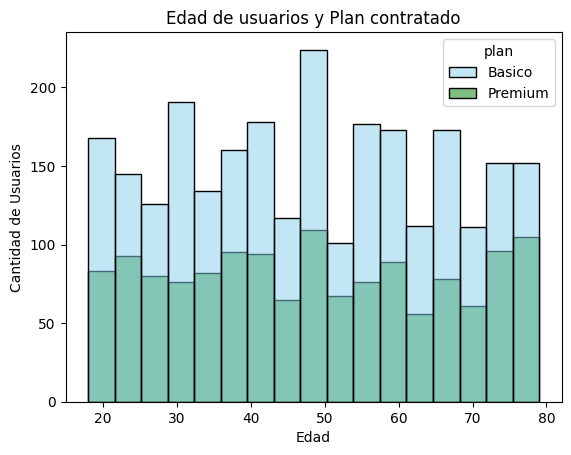

In [24]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x='age', hue='plan', palette=['skyblue','green'])
plt.xlabel('Edad')
plt.ylabel('Cantidad de Usuarios')
plt.title('Edad de usuarios y Plan contratado')
plt.show()

💡Insights: 
- Se observa que la mayoria de los clientes opta por el plan Basico, destaca que el rango de mayor edad tiene a contratar planes premium y la mayoria de los usuarios rondan los 50 años de este rango la mayoria tiene plan Basico

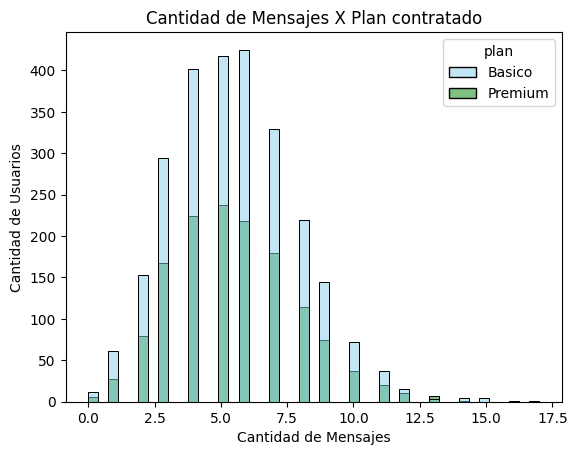

In [25]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x='cant_mensajes', hue='plan', palette=['skyblue','green'])
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Cantidad de Usuarios')
plt.title('Cantidad de Mensajes X Plan contratado')
plt.show()

💡Insights:
Se observa que la mayoria de usuarios se concentra en 5 y 7.5 mensajes. tanto para el plan basico como el premium

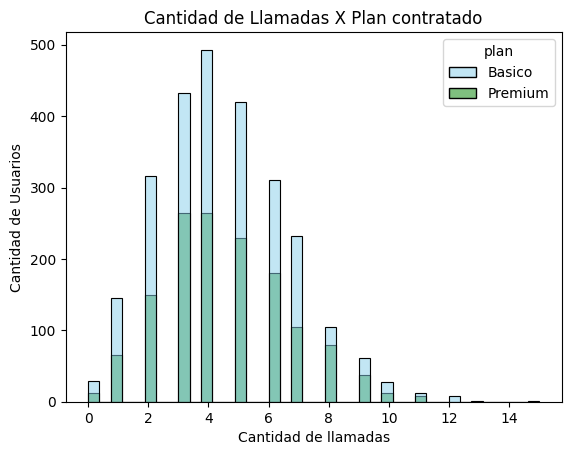

In [26]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x='cant_llamadas', hue='plan', palette=['skyblue','green'])
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Cantidad de Usuarios')
plt.title('Cantidad de Llamadas X Plan contratado')
plt.show()

💡Insights: 
- Distribución Se observa que la gran mayoria de usuarios hace entre 3 y 5 llamadas

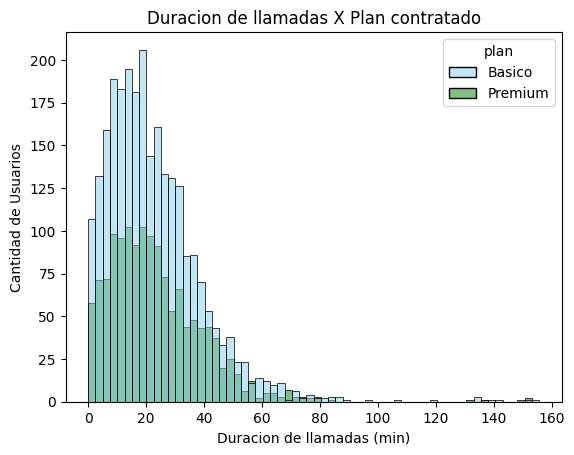

In [27]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan', palette=['skyblue','green'])
plt.xlabel('Duracion de llamadas (min)')
plt.ylabel('Cantidad de Usuarios')
plt.title('Duracion de llamadas X Plan contratado')
plt.show()

💡Insights: 
- Se observa que la gran mayoria de ususarios acumula menos de 40 min en llamadas, para ambos panes.
- Se observa un sesgo a la derecha al ver casos con llamadas cercanos a los 160 min

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

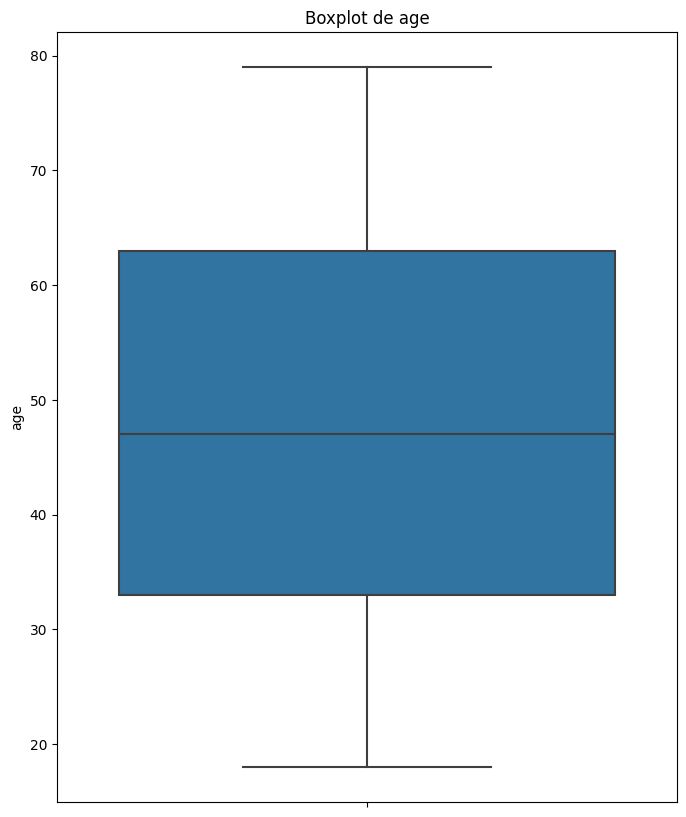

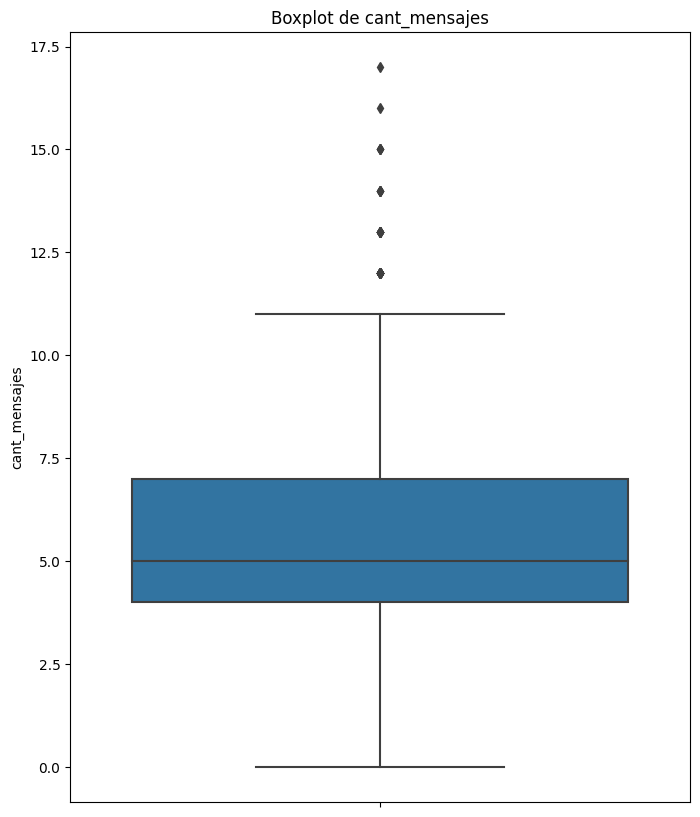

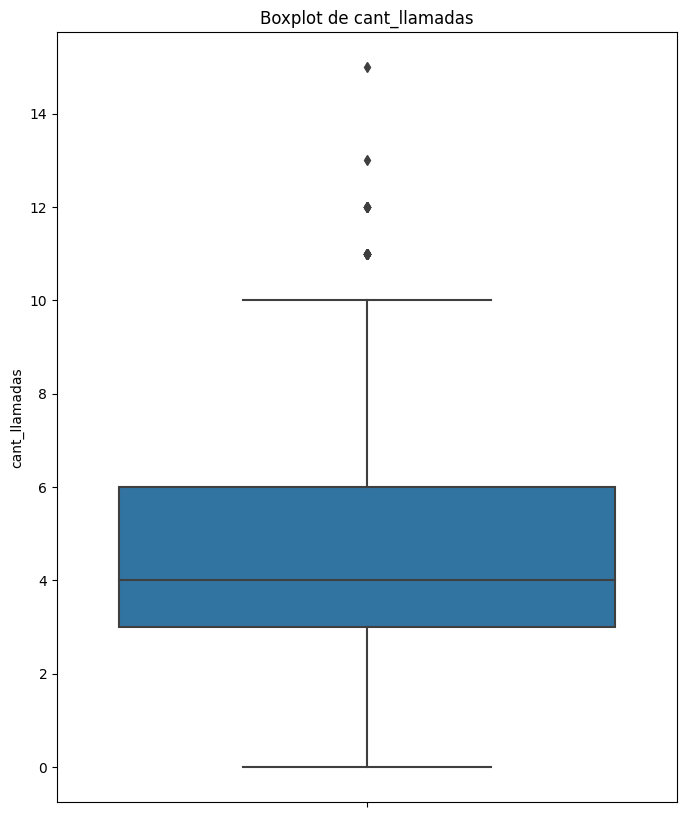

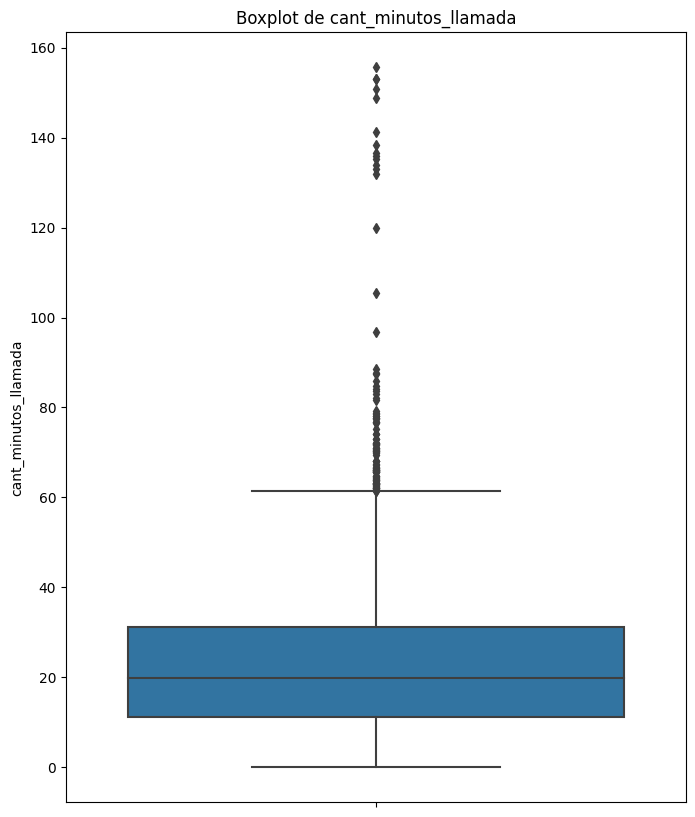

In [28]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for columnas in columnas_numericas:
    plt.figure(figsize=(8,10))
    sns.boxplot(data=user_profile, y=columnas)
    plt.title(f'Boxplot de {columnas}')
    plt.ylabel(columnas)
    plt.show()

💡Insights: 
- Age: no se observan valores atipicos
- cant_mensajes: se observan algunos casos con valores atipicos
- cant_llamadas: Se observan algunos casos con valores atipicos
- cant_minutos_llamada: Tambien s eobservan casos con valores atipicos

In [31]:
# Calcular límites con el método IQR
columnas_limites = [ 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
for col_lim in columnas_limites:
    Q1 = user_profile[col_lim].quantile(0.25)
    Q3 = user_profile[col_lim].quantile(0.75)
    IQR = Q3-Q1
    upper_lim = Q3+1.5*IQR
    print(f'el limite superior para {col_lim} es:', upper_lim)

#user_profile.info()


el limite superior para cant_mensajes es: 11.5
el limite superior para cant_llamadas es: 10.5
el limite superior para cant_minutos_llamada es: 61.31999999999999


In [32]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,22.836934
std,2.358416,2.144238,16.590213
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.095000
50%,5.000000,4.000000,19.740000
75%,7.000000,6.000000,31.185000
max,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué?  Se pueden mantener, ya que es informacion real 
- cant_llamadas: mantener o no outliers, porqué? Se pueden mantener, tambien es inform,acion real
- cant_minutos_llamada: mantener o no outliers, porqué? Se pueden mantener, es informacion real

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [34]:
# Crear columna grupo_uso
user_profile['grupo_uso'] = np.where(user_profile['cant_llamadas'] < 5, np.where(user_profile['cant_mensajes'] < 5, 'Bajo uso', 
                                                                               np.where(user_profile['cant_mensajes'] < 10,'Uso medio', 'Alto uso')),
                                  np.where(user_profile['cant_llamadas'] < 10,np.where(user_profile['cant_mensajes'] < 5,'Uso medio',np.where(user_profile['cant_mensajes'] < 10,
                                                                                                                                             'Uso medio','Alto uso')),
                                          'Alto uso'))


In [35]:
# verificar cambios
user_profile.head()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,grupo_uso
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00,Basico,NaN,Uso medio
1,10001,5,10,33.18,Mateo,Torres,53.0,?,2022-01-01 06:34:17.914478619,Basico,NaN,Alto uso
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,Uso medio
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,Alto uso
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [36]:
# Crear columna grupo_edad
user_profile['grupo_edad']= np.where(user_profile['age'] < 30, 'Joven',np.where(user_profile['age'] < 60, 'Adulto','Adulto Mayor')) 

In [58]:
# verificar cambios
user_profile[['grupo_uso','grupo_edad']].value_counts()

grupo_uso  grupo_edad  
Uso medio  Adulto          1500
           Adulto Mayor     891
           Joven            552
Bajo uso   Adulto           364
           Adulto Mayor     257
           Joven            157
Alto uso   Adulto           153
           Adulto Mayor      74
           Joven             51
dtype: int64

### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

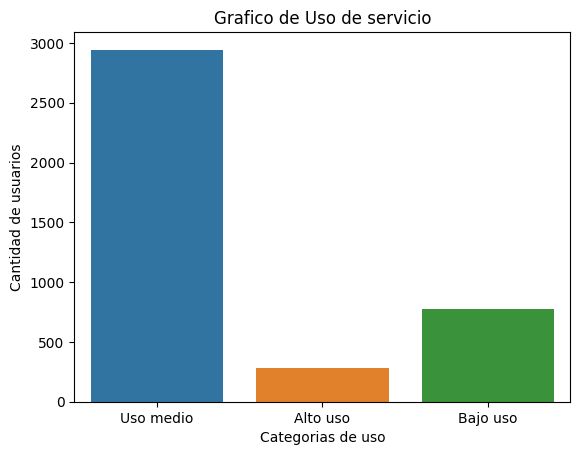

In [52]:
# Visualización de los segmentos por uso

sns.countplot(data=user_profile, x='grupo_uso')
plt.title('Grafico de Uso de servicio')
plt.xlabel('Categorias de uso')
plt.ylabel('Cantidad de usuarios')
plt.show()


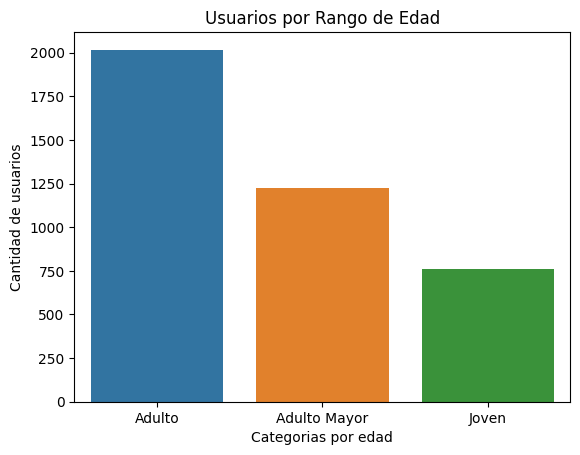

In [48]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x='grupo_edad')
plt.title('Usuarios por Rango de Edad')
plt.xlabel('Categorias por edad')
plt.ylabel('Cantidad de usuarios')
plt.show()



---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?
- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso? 
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?         
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?
- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?
 
  

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Se encontro informacion incompleta en la columna **city**
- La columna **age** contenia inconsistencias (-999) se reemplazo el dato por la mediana
- Tambien se encontraron erroes en las fechas (2026)

🔍 **Segmentos por Edad**
- Se clasificaron por rango de edad:
    - Joven para < de 30 años
    - Adulto para < de 60 años
    - Adulto Mayor para > de 60 años
- Los adultos representan el gran porcentaje de clientes, seguidos de Adultos Mayores y la categoria Joven representa la menor cantidad de clientes
   


📊 **Segmentos por Nivel de Uso**
- La clasifiacion por uso fue en base a la cantidad de llamadas o mensajes:
    - Alto Consumo   10 o más llamadas o mensajes
    - Consumo Medio entre 5 y 9 llamadas o mensajes
    - Bajo Consumo para menos de 5 llamadas o mensajes
- La categoria de **Uso Medio** es la que predomina


➡️ Esto sugiere que 
- El segmento de Adultos es el mas valioso, es donde esta concentrada la mayoria de clientes y tambien los que mayor consumo representan en las tres categorias de consumo


💡 **Recomendaciones**
- Aplicar promociones para generar mayor fidelidad en la categoria Adulto
- Aplicar nuevos planes para atraer nuevos ususarios, planes enfocados en las tres categorias de edades


---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`